<a href="https://colab.research.google.com/github/Shreyas-2607/6thSem-ML-Lab/blob/main/1BM23CS321_ML_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)


In [18]:
print(df.head(10))
print(df.dtypes)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

In [19]:
print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

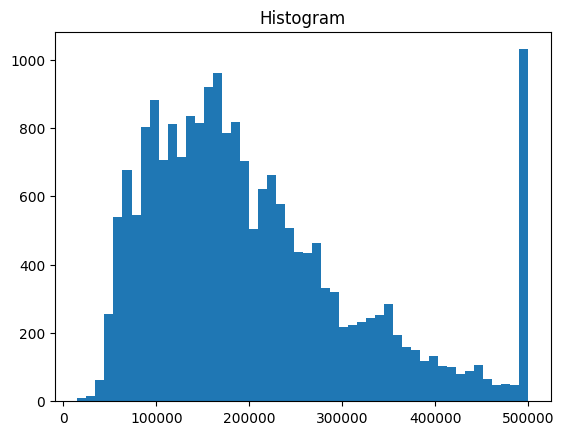

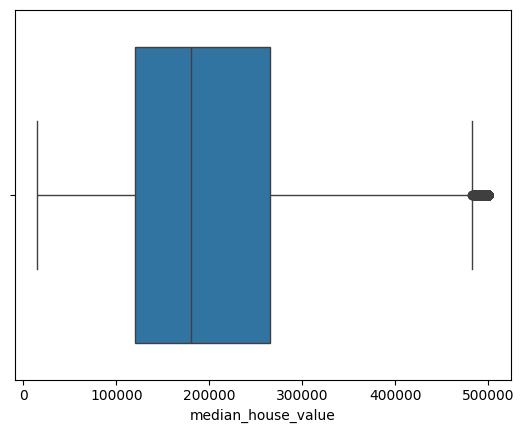

In [20]:
plt.hist(df["median_house_value"], bins=50)
plt.title("Histogram")
plt.show()

sns.boxplot(x=df["median_house_value"])
plt.show()


In [21]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)


longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [22]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [23]:
df = pd.get_dummies(df, columns=["ocean_proximity"])


In [24]:
numeric_cols = df.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [25]:
# The 'url' variable is available from previous cells.
# Load the original dataframe to get unscaled 'median_income' for binning
original_df_for_binning = pd.read_csv(url)

# Create income_cat using the original median_income values and bins
df["income_cat"] = pd.cut(original_df_for_binning["median_income"],
                          bins=[0,1.5,3,4.5,6,np.inf],
                          labels=[1,2,3,4,5],
                          include_lowest=True) # Added include_lowest for robustness

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_idx, test_idx in split.split(df, df["income_cat"]):
    strat_train = df.loc[train_idx]
    strat_test = df.loc[test_idx]

df.drop("income_cat", axis=1, inplace=True)

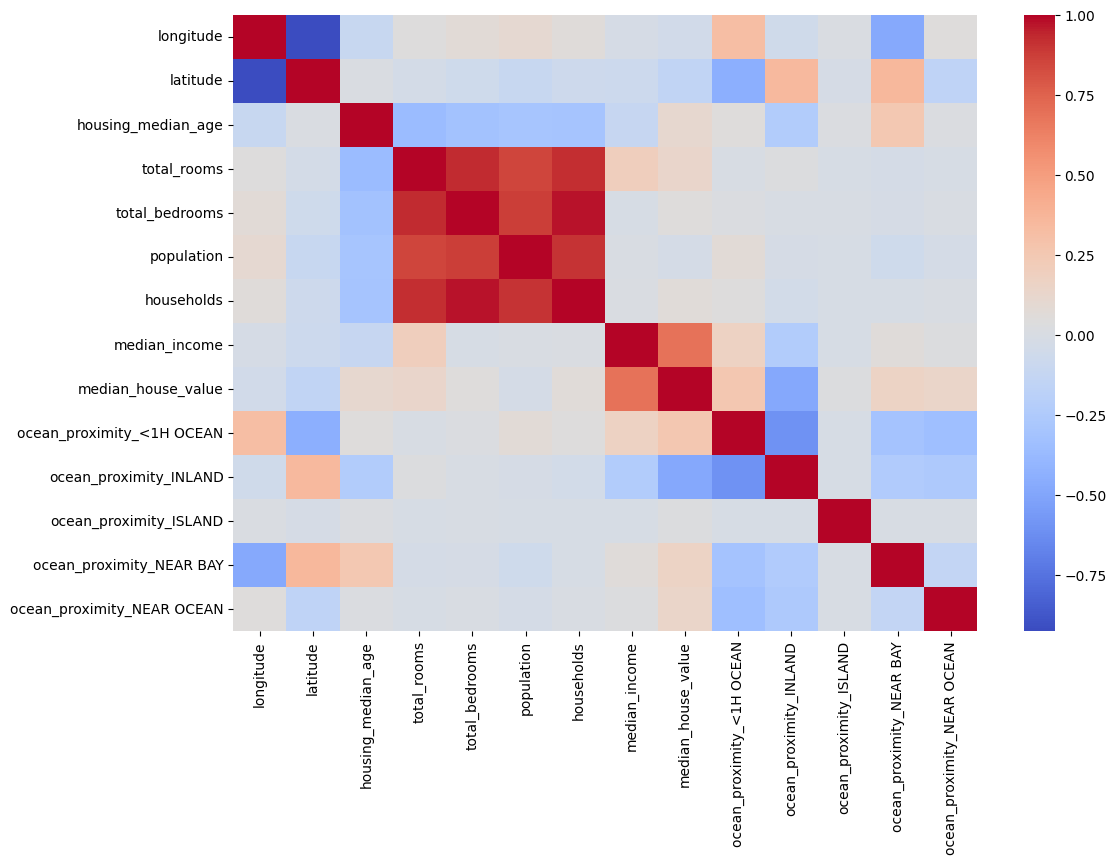

In [26]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm")
plt.show()


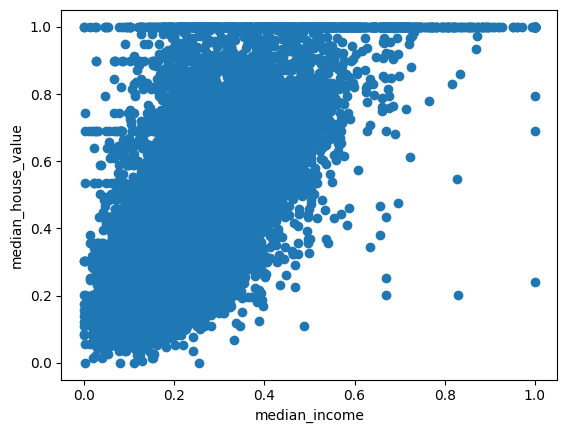

In [27]:
plt.scatter(df["median_income"], df["median_house_value"])
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()


In [28]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [29]:
corr_target = corr["median_house_value"].sort_values(ascending=False)

print("Top 3 Positive:")
print(corr_target[1:4])

print("Most Negative:")
print(corr_target.tail(1))


Top 3 Positive:
median_income                0.688075
ocean_proximity_<1H OCEAN    0.256617
ocean_proximity_NEAR BAY     0.160284
Name: median_house_value, dtype: float64
Most Negative:
ocean_proximity_INLAND   -0.484859
Name: median_house_value, dtype: float64


In [30]:
scaler = StandardScaler()

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_scaled = scaler.fit_transform(X)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


RMSE: 0.14445408852898584
MAE: 0.10447531812440342
R2 Score: 0.6254240620553606
